# WeatherPy
----
#### Analyis
Observed Trends
1.  
2.  
3.  

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

record_counter = 0
set_counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        if record_counter > 49:
            record_counter = 0
            set_counter += 1
        else:
            record_counter += 1
            
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------") 

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lata
City not found. Skipping...
Processing Record 2 of Set 1 | alakurtti
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | flinders
Processing Record 8 of Set 1 | san cristobal
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | portland
Processing Record 12 of Set 1 | harlingen
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | tazovskiy
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | pontal do parana
Processing Record 17 of Set 1 | yar-sale
Processing Record 18 of Set 1 | peniche
City not found. Skipping...
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | brae
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 

Processing Record 33 of Set 4 | aketi
Processing Record 34 of Set 4 | korla
Processing Record 35 of Set 4 | byron bay
Processing Record 36 of Set 4 | loukhi
Processing Record 37 of Set 4 | avera
Processing Record 38 of Set 4 | mbumi
Processing Record 39 of Set 4 | sheregesh
Processing Record 40 of Set 4 | qarqin
Processing Record 41 of Set 4 | boyolangu
Processing Record 42 of Set 4 | itoman
Processing Record 43 of Set 4 | mira
Processing Record 44 of Set 4 | diamantino
Processing Record 45 of Set 4 | guerrero negro
Processing Record 46 of Set 4 | kieta
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | mitzic
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | sinnamary
City not found. Skipping...
Processing Record 0 of Set 5 | kodiak
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | ferkessedougou
Processing Record 3 of Set 5 | brun
Processing Record 4 of Set 5 | hobyo
Processing Record 5 of Set 5 | pokhara
Processi

Processing Record 20 of Set 8 | iqaluit
Processing Record 21 of Set 8 | fortuna
Processing Record 22 of Set 8 | lorengau
City not found. Skipping...
Processing Record 23 of Set 8 | aykhal
Processing Record 24 of Set 8 | west wendover
Processing Record 25 of Set 8 | kroya
Processing Record 26 of Set 8 | benjamin hill
Processing Record 27 of Set 8 | bakel
Processing Record 28 of Set 8 | rosario oeste
Processing Record 29 of Set 8 | ndele
Processing Record 30 of Set 8 | kahului
Processing Record 31 of Set 8 | constitucion
Processing Record 32 of Set 8 | bitam
Processing Record 33 of Set 8 | claresholm
Processing Record 34 of Set 8 | nemuro
City not found. Skipping...
Processing Record 35 of Set 8 | te kauwhata
Processing Record 36 of Set 8 | labuhan
Processing Record 37 of Set 8 | harer
Processing Record 38 of Set 8 | vao
Processing Record 39 of Set 8 | herzberg
Processing Record 40 of Set 8 | bulawayo
Processing Record 41 of Set 8 | muros
Processing Record 42 of Set 8 | talcahuano
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
weatherDF = pd.DataFrame({
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date   
})

weatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lata,40.1629,-8.3327,62.82,55,83,6.82,PT,1650043362
1,Alakurtti,66.9672,30.3491,32.52,74,61,4.65,RU,1650043362
2,Hermanus,-34.4187,19.2345,55.80,58,18,16.98,ZA,1650043363
3,Rikitea,-23.1203,-134.9692,77.58,70,0,16.55,PF,1650043363
4,Khatanga,71.9667,102.5000,13.96,84,100,15.48,RU,1650043363


In [29]:
stats = weatherDF.describe(include="all")
statsDF = stats.drop(columns=["City","Country"],index=["unique","top","freq"])
statsDF

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.212841,17.548439,59.870217,68.679928,58.763110,8.705316,1.650043e+09
std,34.054620,89.725410,23.437310,22.754771,37.996662,5.982522,9.035376e+01
min,-54.800000,-179.166700,-19.770000,1.000000,0.000000,0.000000,1.650043e+09
25%,-8.118100,-65.102300,45.370000,57.000000,20.000000,4.290000,1.650043e+09
50%,25.286700,23.466700,64.810000,73.000000,70.000000,7.180000,1.650043e+09
75%,49.600000,93.450000,77.830000,88.000000,99.000000,11.810000,1.650044e+09
max,78.218600,179.316700,106.160000,100.000000,100.000000,41.430000,1.650044e+09


In [30]:
weatherDF.to_csv("../output_data/city_data.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
humidDF = weatherDF.loc[(weatherDF["Humidity"]>100),:]
humidDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [32]:
#  Get the indices of cities that have humidity over 100%.
humidDF.index

Int64Index([], dtype='int64')

In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weatherDF.merge(humidDF, how="outer")
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lata,40.1629,-8.3327,62.82,55,83,6.82,PT,1650043362
1,Alakurtti,66.9672,30.3491,32.52,74,61,4.65,RU,1650043362
2,Hermanus,-34.4187,19.2345,55.80,58,18,16.98,ZA,1650043363
3,Rikitea,-23.1203,-134.9692,77.58,70,0,16.55,PF,1650043363
4,Khatanga,71.9667,102.5000,13.96,84,100,15.48,RU,1650043363


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder

## Latitude vs. Temperature Plot

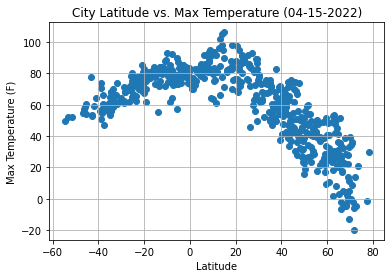

In [43]:
dateLabel = time.strftime("%m-%d-%Y", time.localtime())

x = clean_city_data["Lat"]
t = clean_city_data["Max Temp"]
plt.scatter(x,t)
plt.title(f"City Latitude vs. Max Temperature ({dateLabel})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../Images/Latitude_vs_Temperature")
plt.show()

## Latitude vs. Humidity Plot

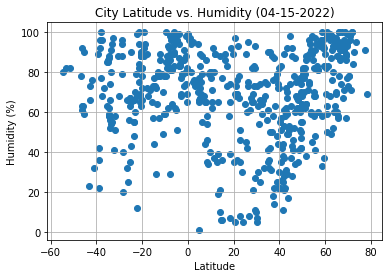

In [44]:

h = clean_city_data["Humidity"]
plt.scatter(x,h)
plt.title(f"City Latitude vs. Humidity ({dateLabel})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/Latitude_vs_Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

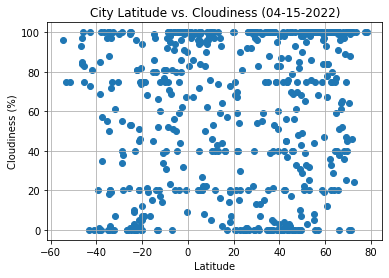

In [45]:

c = clean_city_data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"City Latitude vs. Cloudiness ({dateLabel})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../Images/Latitude_vs_Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

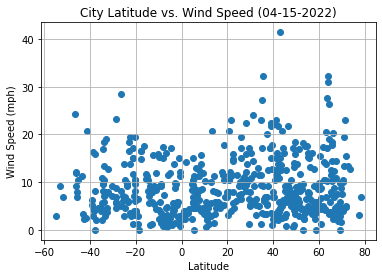

In [47]:
w = clean_city_data["Wind Speed"]
plt.scatter(x,w)
plt.title(f"City Latitude vs. Wind Speed ({dateLabel})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/Latitude_vs_Windspeed")
plt.show()

## Linear Regression

In [48]:
northHemi = clean_city_data.loc[clean_city_data["Lat"] >= 0,:]
southHemi = clean_city_data.loc[clean_city_data["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression